In [54]:
from google.colab import drive
drive.mount ('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [56]:
dataset = '/content/drive/MyDrive/Colab Notebooks/Vehicle Loan Repayment Dataset/Default_Fin.csv'

In [57]:
missing_values = ['-', 'na', 'NA', 'N/A', 'n/a', np.nan]
loan = pd.read_csv(dataset, na_values=missing_values)


In [58]:
loan.drop('Index', axis=1, inplace=True)

In [59]:
loan.rename(columns={'Defaulted?': 'Defaulted'}, inplace=True)
loan

,Employed,Bank Balance,Annual Salary,Defaulted
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0
...,...,...,...,...
9995,1,8538.72,635908.56,0
9996,1,9095.52,235928.64,0
9997,1,10144.92,703633.92,0
9998,1,18828.12,440029.32,0


In [60]:
loan['Defaulted'].value_counts()

0    9667
1     333
Name: Defaulted, dtype: int64

In [61]:
loan.isnull().sum()

Employed         0
Bank Balance     0
Annual Salary    0
Defaulted        0
dtype: int64

In [62]:
loan.duplicated().sum()

0

In [63]:
correlation = loan.corr()

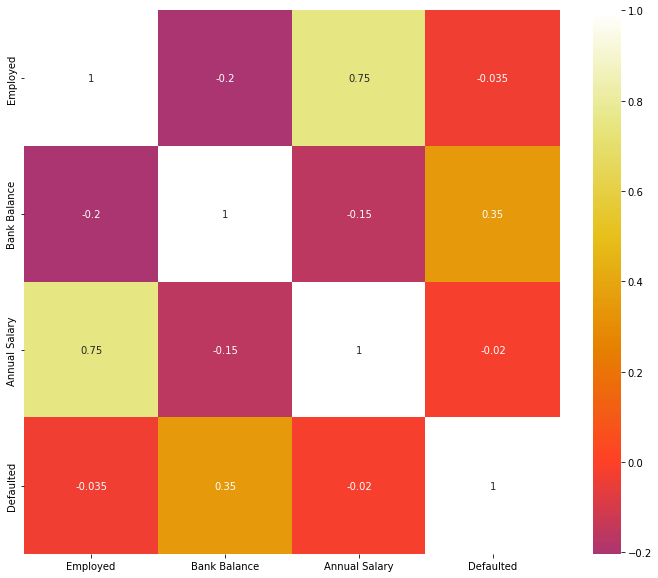

In [64]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, cmap='CMRmap', center=0)
plt.show()

In [65]:
# The features 'Employed' and 'Annual Salary' have a correlation of 0.75. Therefore, 'Employed' can be dropped.

loan.drop('Employed', axis=1, inplace=True)

In [66]:
X = loan.drop('Defaulted', axis=1)
y = loan['Defaulted']

In [67]:
#The classes in this dataset are imbalanced. Therefore, it is necessary to balance them.

from imblearn.over_sampling import SMOTE

sampler = SMOTE(sampling_strategy='not majority', random_state=1)
X_resampled, y_resampled = sampler.fit_resample(X, y)
print(X_resampled.shape, y_resampled.shape)

(19334, 2) (19334,)


In [68]:
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, train_size=0.8, test_size=0.2, random_state=1)

In [69]:
print(y_train.value_counts())
print(y_val.value_counts())

1    7795
0    7672
Name: Defaulted, dtype: int64
0    1995
1    1872
Name: Defaulted, dtype: int64


In [70]:
model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [71]:
prediction_dt = model_dt.predict(X_val)
prediction_dt

array([0, 0, 0, ..., 1, 0, 1])

In [72]:
rmse_dt = sqrt(metrics.mean_squared_error(y_val, prediction_dt))
rmse_dt

0.31140712701980294

In [73]:
score_dt = metrics.accuracy_score(y_val, prediction_dt)
score_dt

0.9030256012412723

In [74]:
dt_matrix = metrics.confusion_matrix(y_val, prediction_dt)
dt_matrix

array([[1782,  213],
       [ 162, 1710]])

In [75]:
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [76]:
prediction_rf = model_rf.predict(X_val)
prediction_rf

array([0, 0, 0, ..., 0, 0, 1])

In [77]:
rmse_rf = sqrt(metrics.mean_squared_error(y_val, prediction_rf))
rmse_rf

0.28084250210826683

In [78]:
score_rf = metrics.accuracy_score(y_val, prediction_rf)
score_rf

0.9211274890095681

In [79]:
rf_matrix = metrics.confusion_matrix(y_val, prediction_rf)
rf_matrix

array([[1789,  206],
       [  99, 1773]])